# ETL, Analysis, and Visualization

**Mauricio Ferragut**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project displays the Extract, Transform, Load (ETL) process, and subsequent data analysis. The project uses the Monthly Retail Trade Survey (MRTS) dataset, a government created dataset which describes retail economic activity in the US. Once the data went through ETL, queries were made in SQL using Python code to analyze trends and visualize the results. Analyses performed include Trends, Percent Change, and Rolling Time Windows.

[Back to top](#Index)


## 1. Introduction
The project is divided into two parts: ETL and Analysis.

During ETL, the data was prepared using Excel, Python, and SQL. Several transformations were made to the data, these are specified in section 2.3 and evident in the installation script in section 2.5.

Once the data was successfully loaded into SQL, queries were made through Python, enabling scalability and further analysis using pandas and visualization using matplotlib. 

[Back to top](#Index)

## 2. Extract-Transform-Load

For each of the sections below, include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

[Back to top](#Index)

### 2.1 The ETL Process

#### Key steps to perform ETL on the provided MRTS dataset.
- Edit the excel spreadsheet, removing rows that will not be relevant to the project.
- Create new spreadsheet with all the years on one page, and add a year column to differentiate them.
- Write python script to transform data into usable form and load it into SQL.

[Back to top](#Index)

### 2.2 Data Exploration


The Monthly Retail Trade Survey (MRTS) dataset contains some of the most comprehensive data available on retail economic activity in the United States. It aims to provide estimates of sales at retail and food services stores. The dataset contains a sample of the overall population, approximately 2,500 businesses of the 13,000 are chosen as the representative sample. It contains sales information in millions of dollars, broken up monthly and yearly. 

The Bureau of Economic Analysis uses the estimates to calculate Gross Domestic Product (GDP). The Bureau of Labor Statistics uses the estimates to develop consumer price indexes and productivity measurements. The Council of Economic Advisers uses the estimates to analyze current economic activity. The Federal Reserve Board uses the estimates to assess recent trends in consumer purchases. The media use the estimates to report news of recent consumer activity. Financial and investment companies use the estimates to measure recent economic trends.

[Back to top](#Index)

### 2.3 Data Preparation

In addition to the suggested changes of removing the unnecessary titles and the adjusted data, I made the following changes:

 - I made a new ID column, with a unique identifier for each kind of business. These two columns will be a separate table.
 - Made a new column for year, and columns for each month of the year, as well as a total column.
 - I found and replaced (S) and (N/A) with empty cells, which I'll deal with as NULLs.
 - Copied the data for 1992-2020 into a single sheet for export into .csv format. This new spreadsheet has 15 columns and 1886 rows.
 - Normalize data into a single timeseries.

[Back to top](#Index)

### 2.4 Read the Data Using Python

To read a CSV file in Python, you first need to import a built-in module called "csv". Then, you need to open the CSV file using the "open" function and provide the filename as an argument. Once the file is opened, you can use the "csv.reader" function to read the contents of the file line by line. The contents of the csv can then be iterated upon to suit your purposes.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

Describe the sample dataset that you have defined to test your Python script to read CSV files and explain how you used Python to read it.

My sample dataset simply had 4 columns and 8 rows.
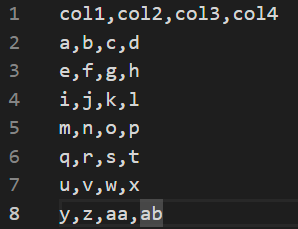

To read it in python, I used the following code:
```python
import csv

#open file
with open("C:/Users/mauri/Documents/Python Scripts/sample_csv.csv") as csv_file:
    
    #read csv file
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    #loop through data
    for row in csv_reader:
        print(row)
```

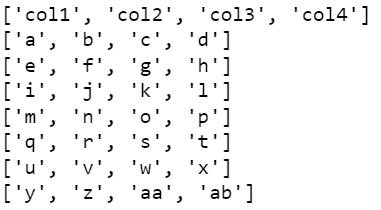

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

To read the MRTS data using python, I used the following code:

```python
import csv

#open file
with open("C:/Users/mauri/Documents/Python Scripts/MRTS - 1992-2020.csv") as csv_file:
    #read csv file
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    #loop through data
    for row in csv_reader:
        print(row)
```

[Back to top](#Index)

### 2.5 Writing an Installation Script
To write a Python installation script to read my dataset in MySQL WorkBench, I: 
- Imported the necessary libraries
- Connected to the mysql server with a cursor class
- Created my database "project8_1"
- Created my tables, "ID_to_Type" and "MRTS"
- Imported and read the csv, iterated through it to create the INSERT statements used to populate the tables
    - Made sure the INSERT statements performed some necessary data cleaning (removing commas, assigning NULLs)
- Created a new table with normalized time series data for analysis purposes
- Commited changes to the SQL server
- Closed the cursor and connection to the server

The script can be seen below:
```python
import yaml
import mysql.connector

db = yaml.safe_load(open('C:/Users/mauri/Documents/Python_Scripts/db.yaml'))

config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'database': db['db'],
    'auth_plugin': 'mysql_native_password'
}

#load config into connector
cnx = mysql.connector.connect(**config)

#The cursor class allows Python code to execute SQL commands in a database session
cursor = cnx.cursor()

#create database
cursor.execute('DROP DATABASE IF EXISTS `project8_1`')
cursor.execute('CREATE DATABASE IF NOT EXISTS `project8_1`') 
cursor.execute('USE `project8_1`')

cursor.execute('SET NAMES UTF8MB4')
cursor.execute('SET character_set_client = UTF8MB4')

#-- --------------------------------------
#--  TABLE ID_to_Type
#-- --------------------------------------

cursor.execute("""
    CREATE TABLE `ID_to_Type` (
        `Business_Type_ID` 		int NOT NULL,
        `Kind_of_Business` 		VARCHAR (90) NOT NULL,
        PRIMARY KEY (`Business_Type_ID`),	
        INDEX `Business_Type_ID` (`Business_Type_ID` ASC)
    ) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci
               """)

#-- --------------------------------------
#--  TABLE MRTS
#-- --------------------------------------

cursor.execute("""
    CREATE TABLE `MRTS` (
	`Business_Type_ID` 		int NOT NULL,
	`Year` 				int NOT NULL,
	`January` 			int NULL,
	`February`			int NULL,
    `March`				int NULL,
    `April`				int NULL,
    `May`				int NULL,
    `June`				int NULL,
    `July`				int NULL,
    `August`			int NULL,
    `September`			int NULL,
    `October`			int NULL,
    `November`			int NULL,
    `December`			int NULL,
    `Total`				int NULL,
	INDEX `Business_Type_ID` (`Business_Type_ID` ASC),
    INDEX `Year` (`Year` DESC),
    FOREIGN KEY (`Business_Type_ID`) REFERENCES `ID_to_Type` (`Business_Type_ID`)
		ON DELETE NO ACTION
		ON UPDATE NO ACTION
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4 COLLATE=utf8mb4_0900_ai_ci
            """)

    
#Insert statements as a loop using csv reader
import csv

# open file
with open("C:/Users/mauri/Documents/Python_Scripts/MRTS - Lookup_Table.csv") as csv_file:
    #read csv file
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    
    
#     loop through data
    for row in csv_reader:
        row[0] = int(row[0])
        #                                          account for apostophes in strings     
        insert_query = (f'''
        INSERT into `ID_to_Type` VALUES({row[0]}, '{row[1].replace("'", "''")}') 
        ''')
        cursor.execute(insert_query)

#open file
with open("C:/Users/mauri/Documents/Python_Scripts/MRTS - 1992-2020.csv") as csv_file:
    #read csv file
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader) #skip header row
    
    #loop through data
    for row in csv_reader:
        counter = 0
        for each in row:
            row[counter] = each.replace(",", "") #remove comma from values in csv
            if row[counter] == "":
                row[counter] = "NULL"              #replace empty cells with NULL
            counter += 1
            
        insert_query = (f'''
        INSERT into `MRTS` VALUES({row[0]}, {row[1]}, {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]}, {row[7]},
        {row[8]}, {row[9]}, {row[10]}, {row[11]}, {row[12]}, {row[13]}, {row[14]})
        ''') 
#         print(insert_query)
        cursor.execute(insert_query)

#Create new table with normalized time series data for analysis
query = (f'''
CREATE TABLE project8_1.mrts_norm
SELECT Business_Type_ID, CAST(CONCAT(Year, "-01-01") AS DATE ) TheDate, January AS Sales FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-02-01") AS DATE) TheDate, February FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-03-01") AS DATE) TheDate, March FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-04-01") AS DATE) TheDate, April FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-05-01") AS DATE) TheDate, May FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-06-01") AS DATE) TheDate, June FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-07-01") AS DATE) TheDate, July FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-08-01") AS DATE) TheDate, August FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-09-01") AS DATE) TheDate, September FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-10-01") AS DATE) TheDate, October FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-11-01") AS DATE) TheDate, November FROM mrts
UNION ALL
SELECT Business_Type_ID, CAST(CONCAT(Year,"-12-01") AS DATE) TheDate, December FROM mrts
''')
cursor.execute(query)

#commit changes
cnx.commit()

#cleanup
cursor.close()
cnx.close()

```



[Back to top](#Index)

## 3. Analysis and Visualization

For each of the sections below, make sure you include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

Here, describe the differences, advantages, and disadvantages of running *queries* against your dataset using the MySQL Workbench or a Python environment.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Describe which *queries* you ran against the MRTS dataset in MySQL Workbench to verify that everything worked as expected.

First, I ran queries selecting everything from my tables to visually inspect that the contents were correct.
```SQL
SELECT * FROM mrts;
```



Then I ran a query calculating the sum of sales across all months and compared it to the total column to verify the data had been properly loaded.
```SQL
SELECT January + February + March + April + May + June + July
+ August + September + October + November + December AS Calculated_Total, 
Total FROM mrts WHERE Year = 2020;
```

![image.png](attachment:image.png)


Lastly, I ran the following query to visualize my normalized time series data:
```SQL
SELECT * FROM mrts_norm WHERE Business_Type_ID = 1 ORDER BY TheDate
```

![image-2.png](attachment:image-2.png)

[Back to top](#Index)

### 3.2 Running Queries From Python

Describe how you tested the previous *queries* on the the MRTS dataset using a Python script and the Terminal window.

I then wrote the same queries in python as follows:

```Python

import yaml
import mysql.connector
import matplotlib.pyplot as plt

db = yaml.safe_load(open('C:/Users/mauri/Documents/Python_Scripts/db.yaml'))

config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'database': db['db'],
    'auth_plugin': 'mysql_native_password'
}

#load config into connector
cnx = mysql.connector.connect(**config)

#The cursor class allows Python code to execute SQL commands in a database session
cursor = cnx.cursor()

#Select database
cursor.execute('USE `project8_1`')

query = ('''SELECT January + February + March + April + May + June + July + August + September + October + November + December AS Calculated_Total, 
Total FROM mrts WHERE Year = 2020''')

cursor.execute(query)

for row in cursor.fetchall():
    print(row)
```
![image.png](attachment:image.png)



```Python
query = ('''SELECT * FROM mrts_norm WHERE Business_Type_ID = 1 ORDER BY TheDate;''')

cursor.execute(query)
    
dates = []
sales = []

#print all the first cell of all the rows
for row in cursor.fetchall():
#     print(row)
    dates.append(row[1])
    sales.append(row[2])

cursor.close()

plt.plot(dates, sales)
plt.title('Sales Over Time for Retail and Food Services Total')
plt.show()
```
![image-4.png](attachment:image-4.png)



[Back to top](#Index)

### 3.3 Explore Trends

Describe which *queries* you wrote the explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?


- What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?


- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly? 

An economic trend is a pattern that shows a relative increase or decrease in the production of goods over time. It is an important measure of the health of the economy, and can be used to predict increases and decrease in consumer spending patterns over time. 

The trend of the retail and food services category over the full timeseries (1992-2020) is generally an uptrend, with a noticeable dip around 2008.  

<function matplotlib.pyplot.show(close=None, block=None)>

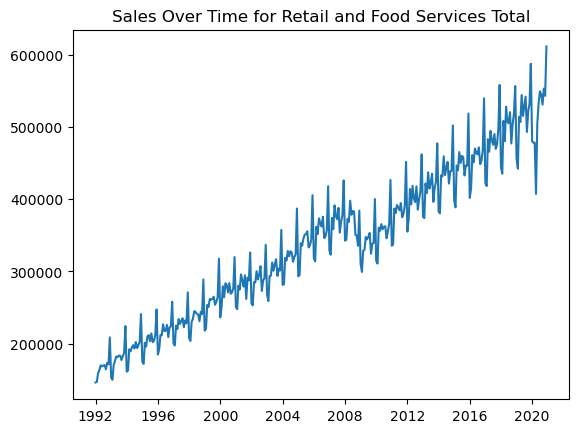

In [1]:
import yaml
import mysql.connector
import matplotlib.pyplot as plt
db = yaml.safe_load(open('C:/Users/mauri/Documents/Python_Scripts/db.yaml'))
config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'database': db['db'],
    'auth_plugin': 'mysql_native_password'
}
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')
query = ('''SELECT * FROM mrts_norm WHERE Business_Type_ID = 1 ORDER BY TheDate;''')
cursor.execute(query)
dates = []
sales = []
#print all the first cell of all the rows
for row in cursor.fetchall():
#     print(row[1])
    dates.append(row[1])
    sales.append(row[2])
cursor.close()
plt.plot(dates, sales)
plt.title('Sales Over Time for Retail and Food Services Total')
plt.show

### Above, the general uptrend can be seen
This graph suffers from a lot of noise. Below, the same graph is plotted but using only data points from the start of each year. 

<function matplotlib.pyplot.show(close=None, block=None)>

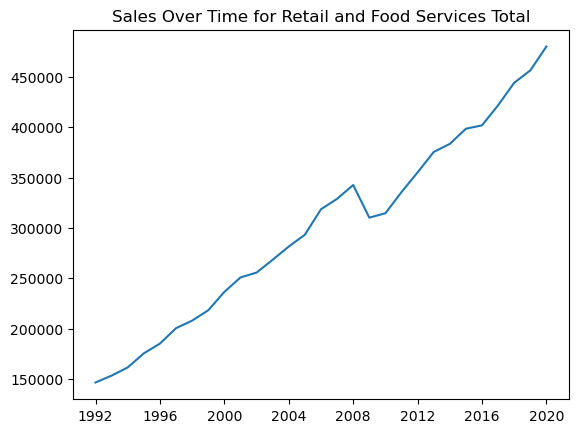

In [2]:
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

date_range = pd.date_range('1992-01-01', '2020-12-01', freq='YS')
# convert date range to string of comma-separated date values
date_str = ",".join([f"'{d.date()}'" for d in date_range])

query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 1 AND TheDate IN ({date_str}) ORDER BY TheDate;''')

cursor.execute(query)
    
dates = []
sales = []

#print all the first cell of all the rows
for row in cursor.fetchall():
#     print(row[1])
    dates.append(row[1])
    sales.append(row[2])

cursor.close()

plt.plot(dates, sales)
plt.title('Sales Over Time for Retail and Food Services Total')
plt.show

### As visible above, the uptrend over time is now easier to see

### Bookstores

<function matplotlib.pyplot.show(close=None, block=None)>

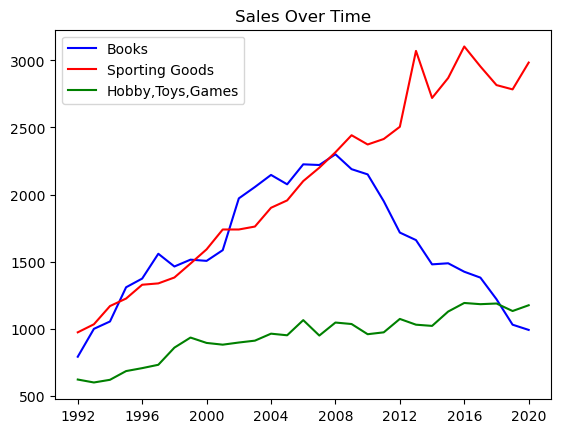

In [3]:
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

date_range = pd.date_range('1992-01-01', '2020-12-01', freq='YS')
# convert date range to string of comma-separated date values
date_str = ",".join([f"'{d.date()}'" for d in date_range])

#Bookstores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 45 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
dates = []
sales_bks = []

for row in cursor.fetchall():
    dates.append(row[1])
    sales_bks.append(row[2])

#Sporting Goods Stores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 43 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
sales_spts = []

for row in cursor.fetchall():
    sales_spts.append(row[2])

#Hobby, Toy, and Game Stores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 44 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
sales_hob = []

for row in cursor.fetchall():
    sales_hob.append(row[2])

cursor.close()

plt.plot(dates, sales_bks, color='b',label="Books")
plt.plot(dates, sales_spts, color='r',label="Sporting Goods")
plt.plot(dates, sales_hob, color='g', label="Hobby,Toys,Games")
plt.title('Sales Over Time')
plt.legend(loc=2)
plt.show


- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, the highest trend is sporting goods stores. It has the most consistently steep positive slope over time. Bookstores were competitive in comparison up until around 2008, when they experienced a downtrend instead.



<function matplotlib.pyplot.show(close=None, block=None)>

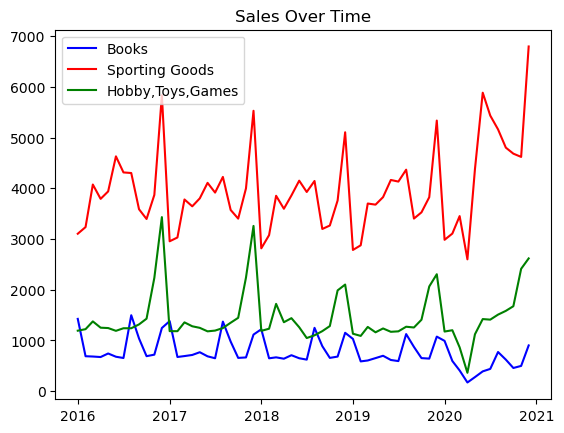

In [4]:
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

date_range = pd.date_range('2016-01-01', '2020-12-01', freq='MS')
# convert date range to string of comma-separated date values
date_str = ",".join([f"'{d.date()}'" for d in date_range])

#Bookstores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 45 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
dates = []
sales_bks = []

for row in cursor.fetchall():
    dates.append(row[1])
    sales_bks.append(row[2])

#Sporting Goods Stores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 43 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
sales_spts = []

for row in cursor.fetchall():
    sales_spts.append(row[2])

#Hobby, Toy, and Game Stores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 44 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
sales_hob = []

for row in cursor.fetchall():
    sales_hob.append(row[2])

cursor.close()

plt.plot(dates, sales_bks, color='b',label="Books")
plt.plot(dates, sales_spts, color='r',label="Sporting Goods")
plt.plot(dates, sales_hob, color='g', label="Hobby,Toys,Games")
plt.title('Sales Over Time')
plt.legend(loc=2)
plt.show


### There is seasonality evident in the trend
There are visible spikes in sales at the end of the year, most likely associated with holiday shopping. The spikes are largest for Sporting Goods Stores, but also sizeable for Hobby, Toys, and Games Stores.

<function matplotlib.pyplot.show(close=None, block=None)>

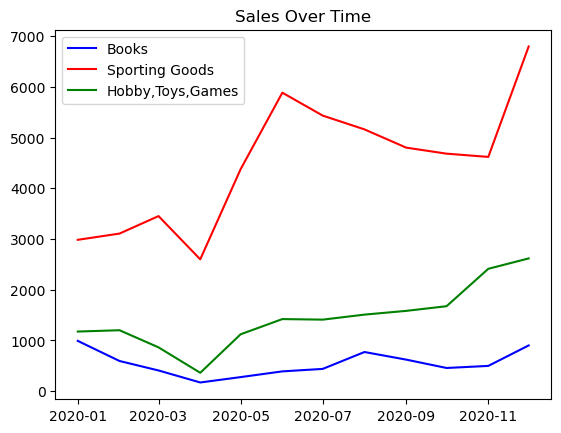

In [5]:
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

date_range = pd.date_range('2020-01-01', '2020-12-01', freq='MS')
# convert date range to string of comma-separated date values
date_str = ",".join([f"'{d.date()}'" for d in date_range])

#Bookstores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 45 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
dates = []
sales_bks = []

for row in cursor.fetchall():
    dates.append(row[1])
    sales_bks.append(row[2])

#Sporting Goods Stores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 43 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
sales_spts = []

for row in cursor.fetchall():
    sales_spts.append(row[2])

#Hobby, Toy, and Game Stores
query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 44 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
cursor.execute(query)
sales_hob = []

for row in cursor.fetchall():
    sales_hob.append(row[2])

cursor.close()

plt.plot(dates, sales_bks, color='b',label="Books")
plt.plot(dates, sales_spts, color='r',label="Sporting Goods")
plt.plot(dates, sales_hob, color='g', label="Hobby,Toys,Games")
plt.title('Sales Over Time')
plt.legend(loc=2)
plt.show

### In 2020, there was a particularly large uptrend for Sporting Goods stores around April
### This can likely be associated to the COVID lockdowns, during which people could not go to the gym and sought at home exercise alternatives.

### Which is better, monthly or yearly granularity? It depends how large a span of time you are looking at. For larger timespans, yearly is better to reduce noise. For smaller timespans, monthly data shows more detail in the trends, allowing the visualization of seasonality. 

[Back to top](#Index)

### 3.4 Explore Percentage Change

Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?
- Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

#### In economics, the percentage change is a measure that shows the relative difference between two values, expressed as a percentage. It is calculated by taking the difference between the two values, dividing it by the original value, and then multiplying by 100.


#### It is considered an important measure to predict quantities like spending patterns because it allows us to compare changes in variables that are measured in different units or have different magnitudes. By analyzing the percentage change in a variable over time, economists can identify patterns and make predictions about future changes. For example, if the percentage change in GDP has been positive for several consecutive quarters, economists may predict that the economy will continue to grow in the future.

### Women's and Men's Clothing Percentage Change
How are these two businesses related?
For each of the two, what is the percentage of contribution to the whole and how does it change over time?

<function matplotlib.pyplot.show(close=None, block=None)>

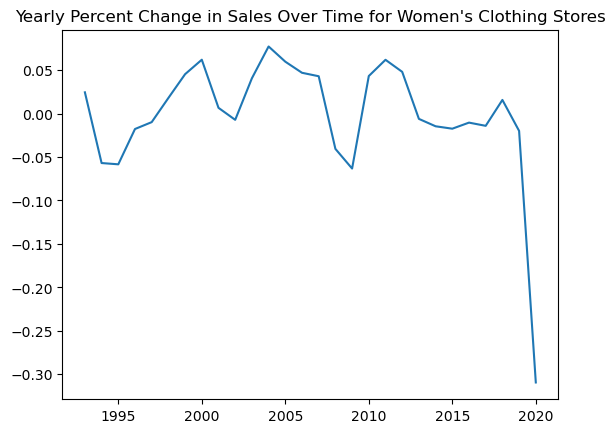

In [6]:
#Women's Clothing Stores
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

#empty list which will hold 2D sales data 
data = [] 
dates = list(range(1992,2021))

for year in range(1992,2021): 
    date_range = pd.date_range(f'{year}-01-01', f'{year}-12-01', freq='MS')
    # convert date range to string of comma-separated date values
    date_str = ",".join([f"'{d.date()}'" for d in date_range])

    query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 37 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
    cursor.execute(query)
    data_row = []
    #populate data list, 12 columns --> one for each month
    for row in cursor.fetchall():
        data_row.append(row[2])
    data.append(data_row)

#create dataframe
df = pd.DataFrame(data)
df["Date"] = dates

monthPC = ["JanPC","FebPC","MarPC","AprPC","MayPC","JunPC","JulPC","AugPC","SepPC","OctPC","NovPC","DecPC"]
counter = 0
for month in monthPC:
    df[f"{month}"] = df[counter].pct_change() #Calculate percent change for each month over all years
    counter += 1

#Calculate average percent change per year
df["AvgYearlyPC"] = df.iloc[:, 13:25].mean(axis=1)

cursor.close()
plt.plot(df['Date'], df["AvgYearlyPC"])
plt.title('Yearly Percent Change in Sales Over Time for Women\'s Clothing Stores')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

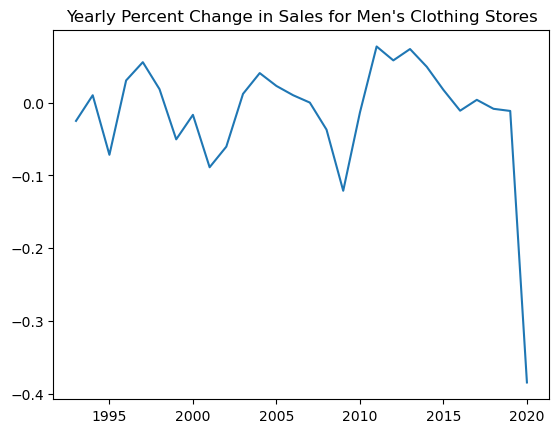

In [7]:
#Men's Clothing Stores 36
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

#empty list which will hold 2D sales data 
data = [] 
dates = list(range(1992,2021))

for year in range(1992,2021): 
    date_range = pd.date_range(f'{year}-01-01', f'{year}-12-01', freq='MS')
    # convert date range to string of comma-separated date values
    date_str = ",".join([f"'{d.date()}'" for d in date_range])

    query = (f'''SELECT * FROM mrts_norm WHERE Business_Type_ID = 36 AND TheDate IN ({date_str}) ORDER BY TheDate;''')
    cursor.execute(query)
    data_row = []
    #populate data list, 12 columns --> one for each month
    for row in cursor.fetchall():
        data_row.append(row[2])
    data.append(data_row)

#create dataframe
df = pd.DataFrame(data)
df["Date"] = dates

monthPC = ["JanPC","FebPC","MarPC","AprPC","MayPC","JunPC","JulPC","AugPC","SepPC","OctPC","NovPC","DecPC"]
counter = 0
for month in monthPC:
    df[f"{month}"] = df[counter].pct_change() #Calculate percent change for each month over all years
    counter += 1

#Calculate average percent change per year
df["AvgYearlyPC"] = df.iloc[:, 13:25].mean(axis=1)

cursor.close()
plt.plot(df['Date'], df["AvgYearlyPC"])
plt.title('Yearly Percent Change in Sales for Men\'s Clothing Stores')
plt.show

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission, make sure to answer the following:

- In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
- Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories?

A rolling time window is a statistical technique that involves analyzing data over a fixed time period, which is shifted forward over time. The rolling window approach is used to identify trends and patterns in economic data, such as spending patterns, over a specified period of time. It is an important measure in predicting quantities like spending patterns because it allows us to identify changes and trends in economic variables over time. By analyzing data in this way, we can identify short-term fluctuations in spending patterns, as well as longer-term trends that may not be apparent from a single snapshot in time.

<function matplotlib.pyplot.show(close=None, block=None)>

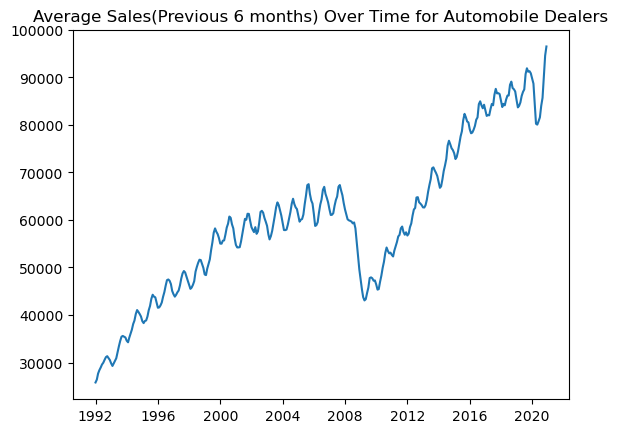

In [8]:
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

# date_range = pd.date_range('1992-01-01', '2020-12-01', freq='YS')
# # convert date range to string of comma-separated date values
# date_str = ",".join([f"'{d.date()}'" for d in date_range])

query = (f'''SELECT business_type_id, TheDate, sales,
       AVG(sales) OVER (PARTITION BY business_type_id ORDER BY TheDate ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS last6months_avg
FROM mrts_norm WHERE Business_Type_ID = 10;;''') #business type 10 = Automobile Dealers

cursor.execute(query)
    
dates = []
roll_avg = []

for row in cursor.fetchall():
#     row[1] = Date
#     row[3] = last6monthsavg(rolling)
    dates.append(row[1])
    roll_avg.append(row[3])

cursor.close()


plt.plot(dates, roll_avg)
plt.title('Average Sales(Previous 6 months) Over Time for Automobile Dealers')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

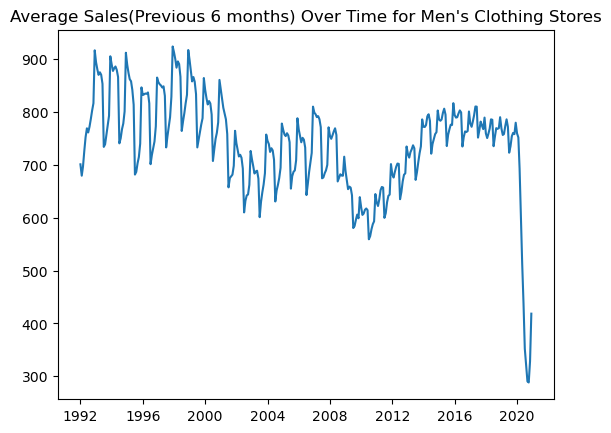

In [9]:
import pandas as pd
cursor = cnx.cursor()
cursor.execute('USE `project8_1`')

query = (f'''SELECT business_type_id, TheDate, sales,
       AVG(sales) OVER (PARTITION BY business_type_id ORDER BY TheDate ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS last6months_avg
FROM mrts_norm WHERE Business_Type_ID = 36;;''') #business type 36 = Men's Clothing

cursor.execute(query)
    
dates = []
roll_avg = []

for row in cursor.fetchall():
#     row[1] = Date
#     row[3] = last6monthsavg(rolling)
    dates.append(row[1])
    roll_avg.append(row[3])

cursor.close()


plt.plot(dates, roll_avg)
plt.title('Average Sales(Previous 6 months) Over Time for Men\'s Clothing Stores')
plt.show

In [10]:
cnx.close()

[Back to top](#Index)

## Conclusion

Describe your conclusions. Which one of the businesses considered seems like it's going to attract the least spending? Which business seems likely to attract the most spending? 

Overall, Automobile Dealers seem likely to attract the most spending, with a sales average of 60,419,000,000 over the full timeseries. Men's Clothing stores seem most likely to attract the least spending, with a sales average of 739,000,000 over the timeseries.


[Back to top](#Index
)
## References

Kumar, Rahul. “ETL Tip: How to Handle Null vs the Blank Fields in Data Warehouse?” Analytics Reckoner. July 25, 2012. Accessed April 6, 2023. https://analyticsreckoner.wordpress.com/2012/07/25/etl-tip-how-to-handle-null-vs-the-blank-fields-in-data-warehouse/.

Pandas Development Team. “pandas.DataFrame.pct_change.” pandas 1.4.7 documentation. Accessed April 6, 2023. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html.

San Diego Regional Data Library. “Census Gov Monthly Retail.” San Diego Regional Data Library. Accessed April 6, 2023. https://data.sandiegodata.org/dataset/census-gov-monthly-retail/.

Stack Overflow. “How can I insert null data into MySQL database with Python?” Stack Overflow. Accessed April 6, 2023. https://stackoverflow.com/questions/5507948/how-can-i-insert-null-data-into-mysql-database-with-python.

U.S. Census Bureau. “About the Surveys.” Monthly Retail Trade Survey (MRTS). U.S. Census Bureau. Accessed April 6, 2023. https://www.census.gov/retail/mrts/about_the_surveys.html.

w3schools.com. “MySQL CONCAT() Function.” w3schools.com. Accessed April 6, 2023. https://www.w3schools.com/sql/func_mysql_concat.asp.
